In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DATA** **AUGUMENTATION**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)

NameError: ignored

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
!unzip /content/drive/MyDrive/Animals/animals.zip -d /content/drive/MyDrive/animals_dataset

Archive:  /content/drive/MyDrive/Animals/animals.zip
   creating: /content/drive/MyDrive/animals_dataset/animals/test/
   creating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/
  inflating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/058fa9a60f.jpg  
  inflating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/17ddf07f85.jpg  
  inflating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/24b29ea96e.jpg  
  inflating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/26ffc1ee1f.jpg  
  inflating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/27a5369441.jpg  
  inflating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/27d251fa65.jpg  
  inflating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/34e5155c46.jpg  
  inflating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/37fccb303f.jpg  
  inflating: /content/drive/MyDrive/animals_dataset/animals/test/antelope/41d7

# **BUILD** **CNN** **MODEL**

**Import** **TensorFlow**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**Download** **and** **prepare** **the** **CIFAR10** **dataset**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


**Verify** **the** **data**

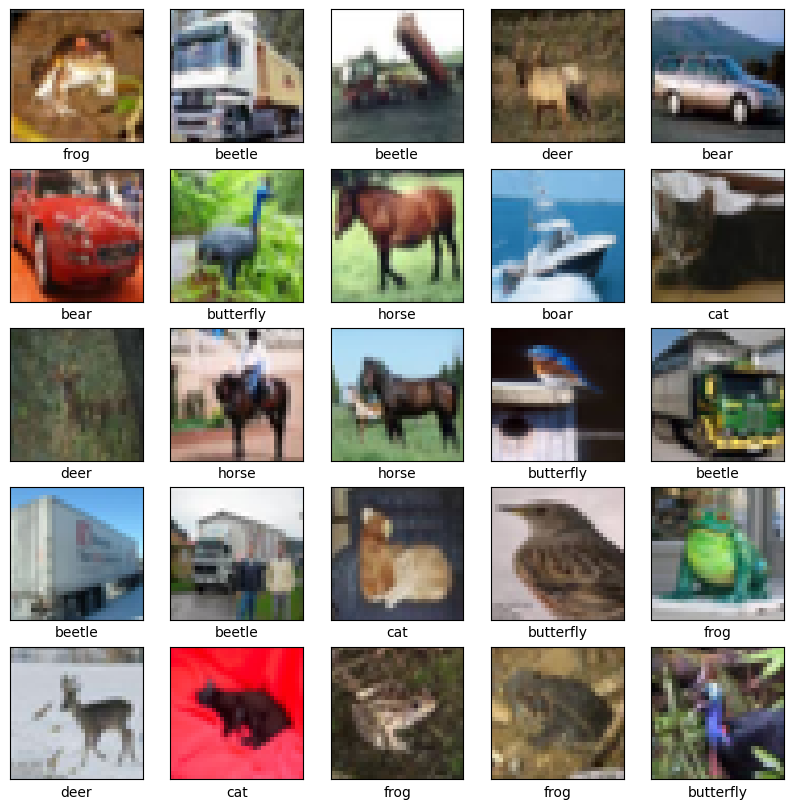

In [ ]:
class_names = ['Bee', 'bear', 'butterfly', 'cat', 'deer',
               'dog', 'frog', 'horse', 'boar', 'beetle']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Create** **the** **convolutional** **base**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Compile and train the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

data = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Epoch 1/5
1563/1563 [==============================] - 87s 55ms/step - loss: 1.0965 - accuracy: 0.6136 - val_loss: 1.0646 - val_accuracy: 0.6264
Epoch 2/5
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9796 - accuracy: 0.6579 - val_loss: 1.0347 - val_accuracy: 0.6338
Epoch 3/5
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9016 - accuracy: 0.6824 - val_loss: 0.9196 - val_accuracy: 0.6804
Epoch 4/5
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8410 - accuracy: 0.7053 - val_loss: 0.9186 - val_accuracy: 0.6861
Epoch 5/5
1563/1563 [==============================] - 83s 53ms/step - loss: 0.7898 - accuracy: 0.7241 - val_loss: 0.8813 - val_accuracy: 0.6961


**Evaluate** **the** **model**



In [ ]:
plt.plot(data.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

**convolution** **layer**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

**pooling** **layer**

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

**flatten** **layer**

In [ ]:
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='softmax'))

## **TEST** **THE** **MODEL**

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 flatten_3 (Flatten)         (None, 30752)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                307530    
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                      